In [ ]:
from Super_class_for_normalization import Super_Normalization as SN
import pandas as pd
import matplotlib.pyplot as plt


class Local_Static(SN):
    
    def __init__(self, catagory):
        SN.__init__(self)
        self.catagory = catagory
        self.Dataframe_with_countries_as_column = SN.get_final_df_Dictionary(self)[catagory]

    # Function divides each data point in a country column with its maximum value
    def Divide_by_local_max(self):
        for column in self.Dataframe_with_countries_as_column:
            # maximun value found
            local_max = self.Dataframe_with_countries_as_column[column].max()
            # the apply method acts on each column data point in the dataframe (default axis value is 0)
            self.Dataframe_with_countries_as_column[column] = self.Dataframe_with_countries_as_column[column].apply(
                lambda x: x/local_max)
            
    ###### Function to be made much better in future
    # Function plots the new cases from each country normalized to the global maximum
    def plot_data_frame(self):
        plt.plot(self.Dataframe_with_countries_as_column)
        plt.title("Normalizing each country with Local Maximum")
        plt.xlabel("Dates")
        
        plt.ylabel("Normalized to 1")
        plt.show()


Catagory = ["new_cases", "new_deaths", "hosp_patients", "icu_patients"]
Ls = Local_Static(Catagory[0])
# Ls.Make_dataframe_with_countries_as_column()
Ls.Divide_by_local_max()
Ls.plot_data_frame()



In [ ]:
Ls.Dataframe_with_countries_as_column.shape[0]

# Local dynamic mean maximum

In [ ]:
from numpy import column_stack
from Super_class_for_normalization import Super_Normalization as SN
import pandas as pd
import matplotlib.pyplot as plt



class Local_Dynamic_Mean_Maximum(SN):
    def __init__(self, catagory):
        SN.__init__(self)
        self.catagory = catagory
        self.Dataframe_with_countries_as_column = SN.get_final_df_Dictionary(self)[
            self.catagory]

    # Function divides and adds each data points of frame by the local maximum
    # uses the applymap method which acts on each data point in the data set
    def Divide_by_max_and_add(self, frame_size):
        temp_data_frame = self.Dataframe_with_countries_as_column
        row_size = temp_data_frame.shape[0]
        column_size = temp_data_frame.shape[1]
        
        #setting each element of the data frame with the value of 0
        self.Dataframe_with_countries_as_column = self.Dataframe_with_countries_as_column.applymap(lambda x: 0)
        
        for i in range(0, row_size):
            
            for j in range(0, column_size):
                
                #condition for the last frame
                if i > row_size-frame_size:
                    local_dynamic_max = temp_data_frame.iloc[i:row_size, j].max()
                    self.Dataframe_with_countries_as_column.iloc[i:row_size, j] += temp_data_frame.iloc[i:row_size, j].apply(lambda x: x/local_dynamic_max)
                    continue
                
                #finding the local maximum within that frame    
                local_dynamic_max = temp_data_frame.iloc[i:i + frame_size + 1, j].max()
                
                # the apply function acts on each country's column's data point in the dataframe
                self.Dataframe_with_countries_as_column.iloc[i:i + frame_size + 1, j] += temp_data_frame.iloc[i:i + frame_size + 1, j].apply(lambda x: x/local_dynamic_max)
                
        print(self.Dataframe_with_countries_as_column)

    # Function takes the mean of each data point acoording to the number of times values have been added to it
    def Divide_by_frame_size(self, frame_size):
        row_size = self.Dataframe_with_countries_as_column.shape[0]
        count_foward = 1
        for i in range(0, row_size):
            
            # Condition for the data points within the first frame
            #??????Shouldn't the first frame columns be also dropped
            if i < frame_size:
                # dividing all the countries for the same date with the frame size
                self.Dataframe_with_countries_as_column.iloc[i] = self.Dataframe_with_countries_as_column.iloc[i]/count_foward
                count_foward += 1
                continue
                
            # Condition for the data points for the latter frames  
            # dividing all the countries for the same date with the frame size
            self.Dataframe_with_countries_as_column.iloc[i] = self.Dataframe_with_countries_as_column.iloc[i]/frame_size
            
        #droping last frame columns    
        self.Dataframe_with_countries_as_column.drop(self.Dataframe_with_countries_as_column.index[row_size-(frame_size+1):row_size], inplace=True)
        print(self.Dataframe_with_countries_as_column)
    # print(self.Dataframe_with_countries_as_column)
    
    
    # Function to be made much better in futrue
    # Function plots the new cases from each country normalized to the local maximum
    def plot_data_frame(self, country):
        plt.plot(self.Dataframe_with_countries_as_column[country])
        plt.title("Normalizing each country with Dynaamic Global Maximums")
        plt.xlabel("Dates")
        plt.ylabel("Normalized to 1")
        plt.show()


frame_size = 80
Catagory = ["new_cases", "new_deaths", "hosp_patients", "icu_patients"]
Ldm = Local_Dynamic_Mean_Maximum(Catagory[0])
Ldm.Divide_by_max_and_add(frame_size)
Ldm.Divide_by_frame_size(frame_size)
Ldm.plot_data_frame(["Germany", "France"])


# Local_dynamic_maximums

[[4789.0, 2313.0, 64038.0, 8921.0, 133480.0, 5254.0, 12399.0, 11812.0, 10879.0, 57378.0, 55120.0, 8438.0, 1451.0, 50889.0, 502507.0, 527487.0, 327.0, 50182.0, 45047.0, 7408.0, 43199.0, 3221.0, 228123.0, 4397.0, 11992.0, 349.0, 15412.0, 5497.0, 1677.0, 6199.0, 520.0, 2960.0, 380399.0, 2332.0, 26109.0, 57659.0, 77281.0, 40018.0, 202211.0, 491.0, 36737.0, 28504.0, 23332.0, 372766.0, 138985.0, 89462.0, 45022.0, 225992.0, 7.0], [4789.0, 2313.0, 64038.0, 8921.0, 133480.0, 5254.0, 12399.0, 11812.0, 10879.0, 57378.0, 55120.0, 8438.0, 1451.0, 50889.0, 502507.0, 527487.0, 327.0, 50182.0, 45047.0, 7408.0, 43199.0, 3221.0, 228123.0, 4397.0, 11992.0, 349.0, 15412.0, 5497.0, 1677.0, 6199.0, 520.0, 2960.0, 380399.0, 2332.0, 26109.0, 57659.0, 77281.0, 40018.0, 202211.0, 491.0, 36737.0, 28504.0, 23332.0, 372766.0, 138985.0, 89462.0, 45022.0, 225992.0, 7.0], [4789.0, 2313.0, 64038.0, 8921.0, 133480.0, 5254.0, 12399.0, 11812.0, 10879.0, 57378.0, 55120.0, 8438.0, 1451.0, 50889.0, 502507.0, 527487.0, 327.0

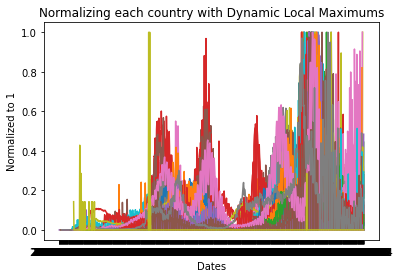

In [10]:
from decimal import MAX_EMAX
from Super_class_for_normalization import Super_Normalization as SN
import pandas as pd
import matplotlib.pyplot as plt


class Local_Dynamic(SN):
    def __init__(self, catagory):
        SN.__init__(self)
        self.catagory = catagory
        self.Dataframe_with_countries_as_column = SN.get_final_df_Dictionary(self)[self.catagory]
        self.max_matrix = None
        self.row_size = self.Dataframe_with_countries_as_column.shape[0]
        self.column_size = self.Dataframe_with_countries_as_column.shape[1]

    # Creates the maximum array
    # The maximum array holds local maximum for all the frames that a particular 
    # data point was unders corresponding to a particular date (row) and countrie (column) 
    def Create_max_array(self, frame_size): 
        
        # matrix of row_size * column_size (row * column)
        self.max_matrix = [[0]*self.column_size]*self.row_size
        
        for i in range(0, self.row_size):
            for j in range(0, self.column_size):
                
                # condition for the last frame
                if i > self.row_size-frame_size:
                    local_frame_max = self.Dataframe_with_countries_as_column.iloc[i:self.row_size, j].max()
                    for k in range(i, frame_size):
                        if self.max_matrix[k][j] < local_frame_max:
                            self.max_matrix[k][j] = local_frame_max
                    continue
                    
                # updates the matrix with the local max for each country for all the frames that a particular 
                # data point was under
                for k in range(i, i+frame_size):
                    local_frame_max = self.Dataframe_with_countries_as_column.iloc[i:i+frame_size+1, j].max()
                    if self.max_matrix[k][j] < local_frame_max:
                        self.max_matrix[k][j] = local_frame_max
        print(self.max_matrix)

    # The function divides each data point by the overall local country's maximum. 
    # This overall max is out of all the local max for various frames that a particular data point was under.
    def Divide_by_max_array(self):
        
        for i in range(0, self.row_size):
            for j in range(0, self.column_size):
                self.Dataframe_with_countries_as_column.iloc[i,j] = self.Dataframe_with_countries_as_column.iloc[i, j]/self.max_matrix[i][j]
        #print(self.Dataframe_with_countries_as_column)

    # Function to be made much better in futrue
    # Function plots the new cases from each country normalized to the overal local maximum
    def plot_data_frame(self):
        plt.plot(self.Dataframe_with_countries_as_column)
        plt.title("Normalizing each country with Dynamic Local Maximums")
        plt.xlabel("Dates")
        plt.ylabel("Normalized to 1")
        plt.show()


Catagory = ["new_cases", "new_deaths", "hosp_patients", "icu_patients"]
Ld = Local_Dynamic(Catagory[0])
# Ld.Make_dataframe_with_countries_as_column()
Ld.Create_max_array(60)
Ld.Divide_by_max_array()
Ld.plot_data_frame()


In [17]:
import pandas as pd
import matplotlib.pyplot as plt

path = "C:/Users/ABHA RANI/Desktop/Amol/Jupyter/RawProjectStorageFile/csvData.csv"

population = pd.read_csv(path)

In [20]:
population = population.iloc[:,0:2]


print(population)

# set_1 = {'Albania', 'Andorra', 'Austria', 'Belarus', 'Belgium',
#        'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia',
#        'Denmark', 'Estonia', 'Faeroe Islands', 'Finland', 'France', 'Germany',
#        'Gibraltar', 'Greece', 'Guernsey', 'Hungary', 'Iceland', 'Ireland',
#        'Isle of Man', 'Italy', 'Jersey', 'Kosovo', 'Latvia', 'Liechtenstein',
#        'Lithuania', 'Luxembourg', 'Malta', 'Moldova', 'Monaco', 'Montenegro',
#        'Netherlands', 'North Macedonia', 'Norway', 'Poland', 'Portugal',
#        'Romania', 'Russia', 'San Marino', 'Serbia', 'Slovakia', 'Slovenia',
#        'Spain', 'Sweden', 'Switzerland', 'Ukraine', 'United Kingdom',
#        'Vatican'}

# set_2 = {'Russia',
# 'Germany',
# 'United Kingdom',
# 'France',
# 'Italy',
# 'Spain',
# 'Ukraine',
# 'Poland',
# 'Romania',
# 'Netherlands',
# 'Belgium',
# 'Czechia',
# 'Greece',
# 'Sweden',
# 'Portugal',
# 'Hungary',
# 'Belarus',
# 'Austria',
# 'Switzerland',
# 'Serbia',
# 'Bulgaria',
# 'Denmark',
# 'Finland',
# 'Norway',
# 'Slovakia',
# 'Ireland',
# 'Croatia',
# 'Moldova',
# 'Bosnia and Herzegovina',
# 'Albania',
# 'Lithuania',
# 'North Macedonia',
# 'Slovenia',
# 'Latvia',
# 'Estonia',
# 'Cyprus',
# 'Luxembourg',
# 'Montenegro',
# 'Malta',
# 'Iceland',
# 'Isle of Man',
# 'Andorra',
# 'Faeroe Islands',
# 'Monaco',
# 'Liechtenstein',
# 'San Marino',
# 'Gibraltar',
# 'Vatican'}

#{'Kosovo', 'Jersey', 'Guernsey'}


#z = set_1.difference(set_2)
#print(z)
# set_2 = 

# explored_set = set()

# #iterating over all the countries in the list
# for index, row in population.iterrows():
#     if row["name"] == 
    #print(row["name"], row["pop"])
    
#     if row["name"] in major_df.columns:
#         major_df.loc[:, row["name"]] = major_df.loc[:, row["name"]].
#     explored
    
    
#{'Kosovo', 'Jersey', 'Czechia', 'Faeroe Islands', 'Guernsey', 'Vatican'}


#Repository

## the apply function acts on each country's column's data point in the dataframe
#self.Dataframe_with_countries_as_column.iloc[i:i + frame_size + 1,j] += temp_data_frame.iloc[i:i + frame_size + 1, j].apply(lambda x: x/local_dynamic_max)


                      name        pop
0                   Russia  145805947
1                  Germany   83883596
2           United Kingdom   68497907
3                   France   65584518
4                    Italy   60262770
5                    Spain   46719142
6                  Ukraine   43192122
7                   Poland   37739785
8                  Romania   19031335
9              Netherlands   17211447
10                 Belgium   11668278
11                 Czechia   10736784
12                  Greece   10316637
13                  Sweden   10218971
14                Portugal   10140570
15                 Hungary    9606259
16                 Belarus    9432800
17                 Austria    9066710
18             Switzerland    8773637
19                  Serbia    8653016
20                Bulgaria    6844597
21                 Denmark    5834950
22                 Finland    5554960
23                  Norway    5511370
24                Slovakia    5460193
25          

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv'
df = pd.read_csv(url)
path = "C:/Users/ABHA RANI/Desktop/Amol/Jupyter/RawProjectStorageFile/csvData.csv"

population = pd.read_csv(path)

In [43]:
import numpy as np

class Super_Normalization():
    # Declaring static url of data
    
    # Declare the path of the population data set
    
    # Declaring standard colors for all countries. These colors will be fixed across all plots
    COLOR = {'France': '#44a2c7', 'Germany': '#f42fa2', 'Finland': '#3b2b99', 'Russia': '#f41f09', 'United Kingdom': '#a25ee1', 'Italy': '#91190a', 'Spain': '#0258bb', 'Sweden': '#2f65bf', 'Slovenia': '#d2ba0d', 'Denmark': '#a83e40', 'Estonia': '#8d3b08', 'Belgium': '#9dbeaa', 'Greece': '#5e4b98', 'Luxembourg': '#b51c57', 'Norway': '#1e5c3e', 'Switzerland': '#2106f2', 'Albania': '#53ace0', 'Austria': '#223406', 'Croatia': '#4f5026', 'Latvia': '#c923cc', 'Romania': '#ae7a50', 'North Macedonia': '#59a61f', 'Serbia': '#96510b', 'Netherlands': '#0525ba', 'Belarus': '#bc6309', 'Iceland': '#e2d4b3',
             'Monaco': '#c28cc5', 'Ireland': '#62b93e', 'San Marino': '#668d02', 'Czechia': '#bcaab2', 'Portugal': '#4851de', 'Andorra': '#c6d06f', 'Ukraine': '#5a7c84', 'Hungary': '#1d9d53', 'Liechtenstein': '#b3a9c0', 'Faeroe Islands': '#d2eef6', 'Poland': '#a55d32', 'Gibraltar': '#bfa438', 'Bosnia and Herzegovina': '#e3cad7', 'Malta': '#2346a6', 'Slovakia': '#732bc8', 'Vatican': '#e52e53', 'Moldova': '#998396', 'Cyprus': '#400089', 'Bulgaria': '#fbe7a8', 'Kosovo': '#f2c023', 'Montenegro': '#a2c1bd', 'Lithuania': '#18a424', 'Isle of Man': '#4a1793', 'Guernsey': '#171d71', 'Jersey': '#256586'}

    def __init__(self, catagory):
        self.data_frame = df
        self.group_by_country = ()
        self.catagory = catagory
        self.test_df = pd.DataFrame()
        
        

    def Filter_Column(self):
        filt = self.data_frame.continent == "Europe"
        self.data_frame = self.data_frame.loc[filt]
        self.data_frame.set_index("date", inplace=True)
        self.data_frame.rename(columns={"location": "country"}, inplace=True)
        self.data_frame = self.data_frame[[
            "country", "new_cases", "new_deaths", "hosp_patients", "icu_patients"]]

    def Grouping_by_country(self):
        self.group_by_country = self.data_frame.groupby("country")

        
    # storing the list of countries with whole column as empty values for a specific parameter
    def list_of_Nan_countries(self, parameter):

        array_of_null_countries = []

        for grouped_country_name, grouped_country_database in self.group_by_country:
            if (len(grouped_country_database) == grouped_country_database[parameter].isnull().sum()):
                array_of_null_countries.append(grouped_country_name)
        return array_of_null_countries

    
    # dataframe of countries for a particular parameter in the form of Pivot Table
    def get_country_df_for_particular_parameter(self, parameter):
        country_df_particular_parameter = self.data_frame.pivot(
            index="date", columns="country", values = parameter)
        return country_df_particular_parameter

    
    # remove the columns of the list of Nan countries from the dataframe
    def delete_Nan_countries_from_df(self, array_of_null_countries, country_df_particular_parameter):

        for df_country in country_df_particular_parameter.columns:
            for array_country in array_of_null_countries:
                if array_country in df_country:
                    del country_df_particular_parameter[df_country]
        return country_df_particular_parameter

    
    # storing the name of the parameters from the data frame of a list
    def getparameter_array(self):
        col_array = []
        for col_name in self.data_frame.columns:
            if(col_name != "date" and col_name != "country"):
                col_array.append(col_name)
        return col_array

    
    # returns the final clean dataset for each parameter in the form of dictionary
    # where the parameter are the keys and data frames are the values
    def get_final_df_Dictionary(self, rolling_days = 14):
        self.Filter_Column()
        self.data_frame.reset_index(inplace=True)
        self.Grouping_by_country()
        dictionary = {}
        col_array = self.getparameter_array()
        for parameter in col_array:
            if parameter == self.catagory:
                Nan_ans = self.list_of_Nan_countries(parameter)
                df_ans = self.get_country_df_for_particular_parameter(parameter)
                deleted_nan_country_df = self.delete_Nan_countries_from_df(
                    Nan_ans, df_ans)
                # final missing values "inside" the dataframe are filled using linear interpolation method
                interpolated_df = deleted_nan_country_df.interpolate(
                    limit_area="inside")
                
                self.test_df = interpolated_df
                print(interpolated_df)
                
                
                #droping specific speical columns whoes data is not in the population database
                del_Col_list = ['Kosovo', 'Jersey', 'Guernsey']
                
                for country in del_Col_list:
                    if country in interpolated_df.columns:
                        interpolated_df = interpolated_df.drop([country], axis = 1)
                        
                    
                 # dividing by the population
                divided_by_population_df = self.Dividing_by_population(interpolated_df)
                
                print(divided_by_population_df)
                
                #finding the rolling _average for better visualisation
                rolling_avg_df = self.rolling_average(divided_by_population_df, rolling_days)
              
                dictionary[parameter] = rolling_avg_df 
                break

        return dictionary
    
    
    def Dividing_by_population(self, interpolated_df):
        
        for index, row in population.iterrows():
            country_name_in_population_df  = row["name"]
            population_value = row["pop"]
            if country_name_in_population_df in interpolated_df.columns:
                interpolated_df.loc[:, country_name_in_population_df] = interpolated_df.loc[:, country_name_in_population_df].apply(lambda x: x/population_value)
                
        return interpolated_df
            

    # The Type argument is the type of Normalization
    # The catagory argument is a catagory such as 'new_cases'
    # The countries = None arguments plots all countries if there are no specified countries
    def plot_data_frame(self, DataFrame, Type, catagory, countries=None, rolling_days = 14, free_pass = False):
        
        #DataFrame = self.rolling_average(DataFrame, rolling_days)
        if not free_pass:
            DataFrame.reset_index(inplace=True)
            DataFrame['date'] = pd.to_datetime(DataFrame['date'])
        

        if countries != None :
            for column in countries:
                if column == 'date':
                    continue
                if column in self.test_df.columns:
                    plt.plot(
                    DataFrame.date, DataFrame[column], color=Super_Normalization.COLOR[column], label=column )
                #plt.xticks(DataFrame.date[::100])
        if countries == None:
            for column in DataFrame:
                if column == 'date':
                    continue
                if column in self.test_df.columns:
                    plt.plot(DataFrame['date'], DataFrame[column], color=Super_Normalization.COLOR[column], label=column)
                #plt.xticks(DataFrame.date[::100])
        plt.title("Normalizing each country with " +
                  Type + " Maximum " + catagory + "\n" + "Frame Size 120")
        plt.xlabel("Dates")
        plt.ylabel("Normalized to 1")
        plt.xticks(DataFrame.date[::90])
        plt.tick_params(axis='x', labelrotation=90)
        #plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
        #plt.legend()
        plt.savefig("Raaju1234567" +'.png', dpi = 300)
        plt.show()
        return DataFrame
        
    
    # new_df = dataframe with date as index and countries as column
    # rolling_days = number of days you want to take average of (strongly recommended that the value should be a multiple of 7)
    def rolling_average(self, new_df, rolling_days):
        
        row_count = new_df.shape[0]
        column_count = new_df.shape[1]

        temp_data_frame = new_df.copy()

        for country_index in range(column_count):

            index_counter = 0

            # for each date in each country
            for date_index in range(row_count):

                # surpass all the Nan values in the dataframe then only proceeding
                if not (np.isnan(new_df.iloc[date_index, country_index])):

                    # summing of the rolling days from the copied data frame
                    # assuming that the dataframe is larger than the rolling_days parameter
                    rolling_counter_index = date_index
                    ending_rolling_counter_index = date_index + rolling_days

                    # finding the mean of all the days within the rolling days window
                    rolling_days_mean = temp_data_frame.iloc[rolling_counter_index:
                                                             ending_rolling_counter_index, country_index].mean()       
                    
                    # updating the new value in the original dataframe
                    new_df.iloc[ending_rolling_counter_index - 1, country_index] = rolling_days_mean

                    # reached the end of the dataframe
                    if(ending_rolling_counter_index - 1 == row_count-1):
                        break

                    # this function will work for the first number of rolling days 
                    # except the last day where we are actually filling the new average value
                    if index_counter < rolling_days -1:
                        # removing (here filling with Nan value) the first rolling days values from the dataframe
                        new_df.iloc[date_index, country_index] = np.nan
                        index_counter += 1
        return new_df 


# Sp = Super_Normalization()
# #you are access the dataframe for each the four parameter by just using passing parameter as the key value
# #in the dictionary
# dict = Sp.get_final_df_Dictionary()
# import pandas as pd
####################################################################################################################

class Global_Static(Super_Normalization):
    # Initiailizig super class and this class
    # also assigning a catagory to each instant. Such as 'new_cases'
    def __init__(self, catagory):
        Super_Normalization.__init__(self, catagory)
        self.catagory = catagory
        self.Dataframe_with_countries_as_column = Super_Normalization.get_final_df_Dictionary(self)[
            self.catagory]

    # Function divides each data point by the global maximum
    # uses the applymap method which acts on each data point in the data set
    def Divide_by_global_max(self):
        global_max = self.Dataframe_with_countries_as_column.max().max()
        self.Dataframe_with_countries_as_column = self.Dataframe_with_countries_as_column.applymap(
            lambda x: x/global_max)
        
    # Function plots the new cases from specified country normalized to the global maximum
    def plot_data_frame(self, countries=None):
        self.Dataframe_with_countries_as_column = super().plot_data_frame(
            self.Dataframe_with_countries_as_column, "Global Static", self.catagory, countries)

####################################################################################################################


class Global_Dynamic(Super_Normalization):
    # Initiailizing super class and this class
    # also assigning a catagory to each instant. Such as 'new_cases'
    def __init__(self, catagory):
        Super_Normalization.__init__(self, catagory)
        self.catagory = catagory
        self.Dataframe_with_countries_as_column = Super_Normalization.get_final_df_Dictionary(self)[
            self.catagory]
        #creating a column of matrix of size (row size * 1)
        self.max_array = [0]*self.data_frame.shape[0]

    # Creates the maximum array
    # The maximum array holds global maximum value for all the frames that a particular 
    # data point was under corresponding to a particular date (row) and country (column) 
    def Create_max_array(self, frame_size):
        
        row_size = self.Dataframe_with_countries_as_column.shape[0]
        
        for i in range(0, row_size):
            
            # condition for the last frame
            if i > row_size - frame_size:
                
                break
                
                
            
            #getting the maximum value
            #there should not be +1 in frame size as we looking for 90 days worth of dataset not 91
            global_frame_max = self.Dataframe_with_countries_as_column.iloc[i: i + frame_size+1].max(
            ).max()
            
            #updating the matrix with the global max value for that window if that value is the greatest of all
            for j in range(i, i + frame_size+1):
                if self.max_array[j] < global_frame_max:
                    self.max_array[j] = global_frame_max

    # Function divides each data point by the global maximum
    def Divide_by_max_array(self):
        row_size = self.Dataframe_with_countries_as_column.shape[0]
        for i in range(0, row_size):
            self.Dataframe_with_countries_as_column.iloc[i] = self.Dataframe_with_countries_as_column.iloc[i]/self.max_array[i]

    # Function plots the new cases from specified country normalized to the global maximum
    def plot_data_frame(self, countries=None):
        super().plot_data_frame(
            self.Dataframe_with_countries_as_column, "Global Dynamic", self.catagory, countries)


# Catagory = ["new_cases", "new_deaths", "hosp_patients", "icu_patients"]
# country = ["France", "Germany", "Italy"]
# Gd = Global_Dynamic(Catagory[0])
# Gd.Create_max_array(60)
# Gd.Divide_by_max_array()
# Gd.plot_data_frame()
##########################################################################################################################

class Global_Dynamic_Mean(Super_Normalization):
    # Initiailizing super class and this class
    # also assigning a catagory to each instant. Such as 'new_cases'
    def __init__(self, catagory):
        Super_Normalization.__init__(self, catagory)
        self.catagory = catagory
        self.Dataframe_with_countries_as_column = Super_Normalization.get_final_df_Dictionary(self)[
            self.catagory]

    # Function divides and adds each data points of frame by the global maximum
    # uses the applymap method which acts on each data point in the data set

    def Divide_by_max_and_add(self, frame_size):
        row_size = self.Dataframe_with_countries_as_column.shape[0]
        temp_data_frame = self.Dataframe_with_countries_as_column.copy()
        
        # setting each element of the data frame with the value of 0
        self.Dataframe_with_countries_as_column = self.Dataframe_with_countries_as_column.applymap(lambda x: 0)
        
        for i in range(1, row_size):
            
            # condition for the last frame
            if i > row_size-frame_size:
                global_dynamic_max = temp_data_frame.iloc[i:row_size].max(
                ).max()
                self.Dataframe_with_countries_as_column.iloc[i:row_size] += temp_data_frame[i:row_size].applymap(
                    lambda x: x/global_dynamic_max)
                continue
               
            # finding the global maximum within that frame
            global_dynamic_max = temp_data_frame.iloc[i:i+ frame_size+1].max().max()
            
            # the apply function acts on each country's column's data point in the dataframe
            self.Dataframe_with_countries_as_column.iloc[i:i+frame_size + 1] += temp_data_frame.iloc[i:i+frame_size+1].applymap(lambda x: x/global_dynamic_max)

    # Function takes the mean of each data point according to the number of times vaules have been added to it
    def Divide_by_frame_size(self, frame_size):
        row_size = self.Dataframe_with_countries_as_column.shape[0]
        count_foward = 1
        for i in range(0, row_size):
            
            # Condition for the data points within the first frame
            # ??????Shouldn't the first frame columns be also dropped
            if i < frame_size:
                
                # dividing all the countries for the same date with the frame size
                self.Dataframe_with_countries_as_column.iloc[i] = self.Dataframe_with_countries_as_column.iloc[i]/count_foward
                count_foward += 1
                continue
                
            self.Dataframe_with_countries_as_column.iloc[i] = self.Dataframe_with_countries_as_column.iloc[i]/frame_size
            
        self.Dataframe_with_countries_as_column.drop(self.Dataframe_with_countries_as_column.index[row_size-(frame_size+1):row_size], inplace=True)

        
    # Function plots the new cases from each country normalized to the global maximum
    def plot_data_frame(self, countries=None):
        super().plot_data_frame(
            self.Dataframe_with_countries_as_column, "Global Dynamic Mean", self.catagory, countries)



C:\Users\ABHA RANI\AppData\Local\Temp/ipykernel_21720/351353.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.data_frame.rename(columns={"location": "country"}, inplace=True)


country     Albania  Andorra  Austria  Belarus  Belgium  \
date                                                      
2020-01-06      NaN      NaN      NaN      NaN      NaN   
2020-01-18      NaN      NaN      NaN      NaN      NaN   
2020-01-24      NaN      NaN      NaN      NaN      NaN   
2020-01-25      NaN      NaN      NaN      NaN      NaN   
2020-01-26      NaN      NaN      NaN      NaN      NaN   
...             ...      ...      ...      ...      ...   
2022-07-23      2.0      0.0      0.0      0.0      0.0   
2022-07-24      2.0      0.0      0.0      0.0      0.0   
2022-07-25      2.0      0.0     28.0      0.0     61.0   
2022-07-26      3.0      0.0      9.0      0.0      NaN   
2022-07-27      3.0      0.0     15.0      0.0      NaN   

country     Bosnia and Herzegovina  Bulgaria  Croatia  Cyprus  Czechia  ...  \
date                                                                    ...   
2020-01-06                     NaN       NaN      NaN     NaN      NaN  ..

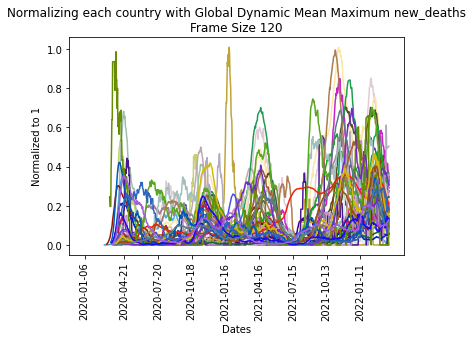

In [44]:
frame_size = 120
i = 1

#Catagory = ["new_cases", "new_deaths", "hosp_patients", "icu_patients"]
#Ldm = Local_Static(Catagory[i])
# # Ldm.Create_max_array(frame_size)
# # Ldm.Divide_by_max_array()
# # Ldm.plot_data_frame()
#Ldm.Divide_by_local_max()
# Ldm.plot_data_frame()

# Catagory = ["new_cases", "new_deaths", "hosp_patients", "icu_patients"]
# Ldm = Global_Static(Catagory[i])
# Ldm.Divide_by_max_and_add(frame_size)
# Ldm.Divide_by_frame_size(frame_size)
# Ldm.plot_data_frame()


List = ['Russia',
'Germany','United Kingdom','France','Italy','Spain','Ukraine','Poland','Romania','Netherlands','Belgium','Czechia','Greece','Sweden','Portugal','Hungary',
'Belarus','Austria','Switzerland','Serbia','Bulgaria','Denmark','Finland','Norway','Slovakia','Ireland','Croatia','Moldova','Bosnia and Herzegovina','Albania','Lithuania','North Macedonia','Slovenia','Latvia','Estonia',
'Cyprus','Luxembourg','Montenegro','Malta','Iceland','Isle of Man','Andorra','Faeroe Islands','Monaco','Liechtenstein','San Marino','Gibraltar',
'Vatican']


# Catagory = ["new_cases", "new_deaths", "hosp_patients", "icu_patients"]
# Ldm = Global_Static(Catagory[i])
# Ldm.Divide_by_global_max()
# Ldm.plot_data_frame(List)

# #Global Max
# Catagory = ["new_cases", "new_deaths", "hosp_patients", "icu_patients"]
# Ldm = Global_Dynamic(Catagory[i])
# Ldm.Create_max_array(90)
# Ldm.Divide_by_max_array()
# Ldm.plot_data_frame()


#Global Dynamic Mean Max
Catagory = ["new_cases", "new_deaths", "hosp_patients", "icu_patients"]
Ldm = Global_Dynamic_Mean(Catagory[i])
Ldm.Divide_by_max_and_add(frame_size)
Ldm.Divide_by_frame_size(frame_size)
Ldm.plot_data_frame()



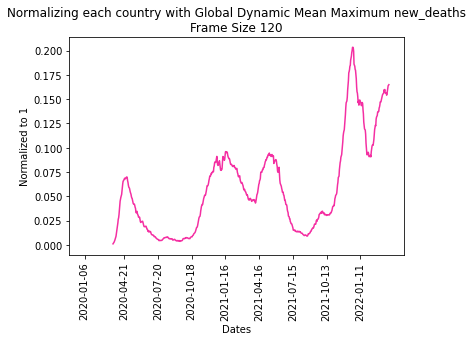

In [45]:
Ldm.plot_data_frame(["Germany"])

In [132]:
diamond_df = Ldm.Dataframe_with_countries_as_column.copy()
signed_df = Ldm.Dataframe_with_countries_as_column.copy()
diamond_df.max()

country
date                      2022-03-20 00:00:00
Albania                              0.161539
Andorra                              0.535017
Austria                              0.333407
Belarus                              0.096697
Belgium                               0.68136
Bosnia and Herzegovina               0.850536
Bulgaria                             1.008333
Croatia                              0.707029
Cyprus                               0.265603
Czechia                              0.499322
Denmark                              0.483638
Estonia                              0.451867
Faeroe Islands                       0.478649
Finland                              0.178205
France                               0.352301
Germany                              0.203449
Gibraltar                            1.008333
Greece                                0.54693
Hungary                              0.841669
Iceland                              0.310943
Ireland                   

In [96]:
#diamond_df.reset_index(inplace = True)

#deleting the first two rows as they are garbage rows.
diamond_df.drop([0,1], axis=0, inplace=True)
signed_df.drop([0,1], axis=0, inplace=True)

In [52]:
diamond_df

country,date,Albania,Andorra,Austria,Belarus,Belgium,Bosnia and Herzegovina,Bulgaria,Croatia,Cyprus,...,San Marino,Serbia,Slovakia,Slovenia,Spain,Sweden,Switzerland,Ukraine,United Kingdom,Vatican
2,2020-01-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2020-01-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2020-01-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784,2022-03-16,0.001945,0.040063,0.334576,0.012951,0.058535,0.003710,0.019368,0.026530,0.173062,...,0.066658,0.020324,0.165154,0.079191,0.025005,0.011481,0.236612,0.009062,0.073939,0.0
785,2022-03-17,0.002125,0.066183,0.352239,0.012892,0.061315,0.003454,0.020066,0.027353,0.183625,...,0.062052,0.020342,0.165764,0.083157,0.022391,0.011120,0.246252,0.008961,0.078415,0.0
786,2022-03-18,0.001885,0.059940,0.368575,0.012892,0.054599,0.003297,0.019818,0.028463,0.192788,...,0.065216,0.020255,0.164681,0.087415,0.027853,0.011201,0.250309,0.008811,0.083222,0.0
787,2022-03-19,0.002065,0.060524,0.384385,0.012832,0.060908,0.003329,0.019610,0.029102,0.201912,...,0.065851,0.020264,0.164706,0.092019,0.028125,0.011310,0.252745,0.008679,0.084033,0.0


In [45]:
def num_to_sign_converter(val):
    
    if val <= 0.333:
        #assign the value - (mild)
        return "-"
        
    elif val > 0.33 and val <= 0.666:
         #assign the value + (moderate)
        return "+"
    
    elif val > 0.666 and val <= 1:
         #assign the value ++ (severe)
        return "++"
    else:
        return np.nan

In [46]:

signed_df.set_index('date', inplace = True)
final_df = signed_df.applymap(lambda x : num_to_sign_converter(x))
# for i in range(0, row_size):
#     for j in range(1, column_size):
#         if not (pd.isnull(diamond_df.iloc[i,j])):
#             sign = num_to_sign_converter(diamond_df.iloc[i,j])
#             diamond_df.iloc[i,j] = sign
            
            
            


In [47]:
final_df.iloc[0:50,:]
#final_df.to_excel("Global_Mean_Max_New_Deaths.xlsx")
temp_df = diamond_df
max_max_value_out_of_all_the_dates_for_each_country = diamond_df.max()[1:]

country,Albania,Andorra,Austria,Belarus,Belgium,Bosnia and Herzegovina,Bulgaria,Croatia,Cyprus,Czechia,...,San Marino,Serbia,Slovakia,Slovenia,Spain,Sweden,Switzerland,Ukraine,United Kingdom,Vatican
date,,,,,,,,,,,,,,,,,,,,,
2020-01-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
#database = final_df


#Step 0:

def sliding_technique_matrix_formation (frame_size, data_frame, country_list):
    
    
    #deep copying the orginal data frame
    signed_dataframe = data_frame.copy()
    
    for country in country_list:
        
        #intialising variables
        start_index = 0
        end_index = 0
        sliding_value_of_each_frame = 7 #days
        country_val_series = data_frame[country]
        length_of_the_series = country_val_series.shape[0]
        
        #finding the number of leftover days: sure to be less than 7 days
        remaining_unanalysed_days = (length_of_the_series - frame_size) % sliding_value_of_each_frame

        for slide in range(0,length_of_the_series, sliding_value_of_each_frame):
            
            start_index = slide
            end_index = slide + frame_size
            
            if end_index > length_of_the_series:
                break
            
            #finding the min and max value from the country's column for that particular frame
            min_val_in_series = country_val_series.iloc[start_index : end_index].min()
            max_val_in_series = country_val_series.iloc[start_index : end_index].max()
            
            #finding the threshold values for dividing that frame's country's values into three groups. 
            bins = np.linspace(min_val_in_series, max_val_in_series, 4)
            group_names = ["-","+","++"]
            
            #updating the frame in the new signed data_frame with the group names using the cut function from pandas
            signed_dataframe[country].iloc[start_index : end_index] = pd.cut(data_frame[country].iloc[start_index : end_index], bins, labels = group_names, include_lowest = True)
            # Intervals are like this [a,b],(b,c], (c,d] for -, + and ++
            
            print("Country Name: ", country)
            print("From data: ", data_frame["date"][start_index] , " to ", data_frame["date"][end_index - 1])
            probability_transition_matrix_generator(signed_dataframe[country][start_index : end_index], start_index, end_index)
            
def probability_transition_matrix_generator(country_series_values, start_index, end_index):
    
    #creating a numpy matrix
    transition_matrix = np.matrix([[0.0,0,0],
                                   [0,0,0],
                                   [0,0,0]])
    
    
    #iterating and comparing each value of the series
    #- 1 because in the call the country's index on the right hand side in the parameter is exclusive
    for index in range(start_index, end_index - 1):

        if country_series_values[index] == "-" and country_series_values[index+1] == "-":
            transition_matrix[0,0] += 1
            
        elif country_series_values[index] == "-" and country_series_values[index+1] == "+":
            transition_matrix[0,1] += 1  

        elif country_series_values[index] == "-" and country_series_values[index+1] == "++":
            transition_matrix[0,2] += 1

        elif country_series_values[index] == "+" and country_series_values[index+1] == "-":
            transition_matrix[1,0] += 1

        elif country_series_values[index] == "+" and country_series_values[index+1] == "+":
            transition_matrix[1,1] += 1

        elif country_series_values[index] == "+" and country_series_values[index + 1] == "++":
            transition_matrix[1,2] += 1

        elif country_series_values[index] == "++" and country_series_values[index + 1] == "-":
            transition_matrix[2,0] += 1

        elif country_series_values[index] == "++" and country_series_values[index + 1] == "+":
            transition_matrix[2,1] += 1

        elif country_series_values[index] == "++" and country_series_values[index + 1] == "++":
            transition_matrix[2,2] += 1 

    sum_of_columns = transition_matrix.sum(axis = 1)
    transition_matrix[0,:] = transition_matrix[0,:]/sum_of_columns[0,0]
    transition_matrix[1,:] = transition_matrix[1,:]/sum_of_columns[1,0]
    transition_matrix[2,:] = transition_matrix[2,:]/sum_of_columns[2,0]

    print("Transition Matrix: ", "\n\n", transition_matrix, "\n")

def customised_probability_transition_matrix_generator(data_frame, country_list ):
    
    for country in country_list:
        val_series = data_frame[country]
        start_index = 0
        end_index = data_frame.shape[0] - 1
        print(country, " \n")
        probability_transition_matrix_generator(val_series, start_index, end_index + 1)
        
    
def creating_signed_dataframe(data_frame):
    
    signed_data_frame = data_frame.copy()
    
    for country in data_frame.columns:
        if country == "date": continue
            
        country_column = data_frame[country]
        min_val = country_column.min()
        max_val = country_column.max()
        
        #tranforming the unsigned dataframe into signed dataframe
        signed_data_frame[country] = assigning_sign_values(min_val, max_val, data_frame, country)
    
    return signed_data_frame

def assigning_sign_values(min_val, max_val, data_frame, country):
    
    #finding the threshold values for dividing that frame's country's values into three groups. 
    bins = np.linspace(min_val, max_val, 4)
    group_names = ["-","+","++"]
            
    #dividing into groups using the cut function from pandas
    output_df = pd.cut(data_frame[country], bins, labels = group_names, include_lowest = True)
    return output_df
    # Intervals for the groups are like-- [a,b],(b,c], (c,d] for -, + and ++

def creating_weightage_data_frame (signed_data_frame):
    
    #doing this so that the date's column does not get converted also
    signed_data_frame.set_index("date", inplace = True)
    weightage_signed_data_frame = signed_data_frame.applymap(lambda x: sign_to_weight_val_converter(x))
    weightage_signed_data_frame.reset_index(inplace = True)
    return weightage_signed_data_frame


def sign_to_weight_val_converter(val):
    
    if val == "-":
        return -1
    elif val == "+":
        return 0
    elif val == "++":
        return 1
    
def creating_weekly_transition_dataframe(average_weeks_in_days, weightage_signed_data_frame):
    
    row = weightage_signed_data_frame.shape[0]
    column = weightage_signed_data_frame.columns
    #taking floor function because to convert val such as 2.3 or 2.7 to 2 weeks 
    end_index = math.floor(row/average_weeks_in_days)
    week_counter = 0
    weightage_signed_data_frame['date'] = weightage_signed_data_frame['date'].astype(str)
    
    #creating a new dataframe of size 1/average_weeks_in_days th of the weightage_signed_data_frame
    weekly_transition_dataframe = pd.DataFrame(index = range(0, end_index), columns = column)
    
    
    for col in column:
        
        if col == "date": continue
            
        col_val = weightage_signed_data_frame[col]
        row_size = weightage_signed_data_frame.shape[0]
        
        for x in range(0, row_size, average_weeks_in_days):
            start_index = x
            end_index = x + average_weeks_in_days
            
            if end_index > row_size: break
            
            #storing the last date of this week's frame
            weekly_transition_dataframe['date'][x/average_weeks_in_days] = weightage_signed_data_frame['date'][end_index - 1]
            
            #surpassing all the beginning Nan values
            if any (np.isnan(weightage_signed_data_frame[col][start_index:end_index])):
                 continue
                
           
            val = weightage_signed_data_frame[col][start_index:end_index].mean()
            
            if val >= -1 and val < -0.33:
                weekly_transition_dataframe[col][x/average_weeks_in_days] = "-"
            elif val >= -0.33 and val < 0.33:
                weekly_transition_dataframe[col][x/average_weeks_in_days] = "+"
            elif val >= 0.33 and val <= 1:
                weekly_transition_dataframe[col][x/average_weeks_in_days] = "++"
            
    #converting the date column to data time series for consistency
    weekly_transition_dataframe['date'] = pd.to_datetime(weekly_transition_dataframe['date'])
    return weekly_transition_dataframe
    
    

##main
import numpy as np
import math

original_df = Ldm.Dataframe_with_countries_as_column.copy()

#removing empty rows

original_df.drop([0,1], axis=0, inplace=True)
original_df.drop(["index"], axis=1, inplace=True)
original_df.reset_index(drop = True, inplace = True)


"""
Technique 1:
output will give you probability transition matrix of each country using the sliding technique on the complete orignal database
(uncomment the below lines and run to unleash its power)
(you can change or add countries in the list)
"""
#sliding_technique_matrix_formation(frame_size = 150, data_frame = original_df , country_list = ['France', 'Germany', "United Kingdom"])

"""
Technique 2:
output will give you probability transition matrix of country using a weekly average database
(uncomment the below lines once by selecting all the below lines and clicking  ctrl + / and then run to unleash their power)
(you can also add more countries in the list)
"""
# #the output dataframe has been catagorised into three groups of -,+, and ++ 
# signed_dataframe = creating_signed_dataframe(original_df)
# #the output dataframe has -1,0,1 instead of -,+,++
# weightage_signed_df = creating_weightage_data_frame(signed_dataframe)

# #the output dataframe will take average of contiguous days' values and then store it as an single unit
# #e.g avg of first 7 days and then store the mean value as week 1, next 7 days and storing it as week 2
# weekly_transition_df = creating_weekly_transition_dataframe(average_weeks_in_days = 10, weightage_signed_data_frame = weightage_signed_df)

# #display the probability transition matrix of the countries mentioned in the list
# customised_probability_transition_matrix_generator(weekly_transition_df, country_list = ["France","Germany", "United Kingdom"])
# weekly_transition_df

# original_df.to_excel("original_df.xlsx")
# signed_dataframe.to_excel("signed_dataframe.xlsx")
# weightage_signed_df.to_excel("weightage_signed_df.xlsx")
# weekly_transition_df.to_excel("weekly_transition_df.xlsx")


'\nTechnique 2:\noutput will give you probability transition matrix of country using a weekly average database\n(uncomment the below lines once by selecting all the below lines and clicking  ctrl + / and then run to unleash their power)\n(you can also add more countries in the list)\n'

In [73]:
print(type(original_df["date"][0]))
original_df["date"][0] = original_df["date"][0]weightage_signed_data_frame['date'].astype(str)

def derivative(data_frame, country_list ):
    
    for country in country_list:
        val_series = data_frame[country]
        print("checkpoint1: ", val_series)
        derivative_val_series = np.copy(val_series)
        date_val_series = np.copy(val_series)
        
        if country == "date": continue
        
        row = val_series.shape[0]
        print("checkpoint2: ", row )
        day = 1
        for x in range(row-day):
            if any (np.isnan(val_series[x:x+day])):
                continue
            
            change_in_y = val_series[x+day] - val_series[x]
            derivative_val_series [x] = change_in_y # divided by change in x which is 1
            date_val_series [x] = data_frame["date"][x]
        derivative_val_series[x+1] = np.nan
        print("checkpoint3: ", derivative_val_series )
        
        #derivative_val_series.plot(figsize=(15, 10))
        plt.figure(figsize=(30,5))
        plt.plot(derivative_val_series, date_val_series )
        
        
derivative(original_df, ["France"])

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
checkpoint1:  0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
790    0.113282
791    0.111707
792    0.113376
793    0.114735
794    0.112341
Name: France, Length: 795, dtype: float64
checkpoint2:  795


TypeError: float() argument must be a string or a number, not 'Timestamp'

# Advanced Technique

In [40]:
def advance_sliding_technique_matrix_formation (frame_size, data_frame, country_list):
    
    
    #deep copying the orginal data frame
    signed_dataframe = data_frame.copy()
    
    for country in country_list:
        
        #intialising variables
        start_index = 0
        end_index = 0
        sliding_value_of_each_frame = 7 #days
        country_val_series = data_frame[country]
        length_of_the_series = country_val_series.shape[0]
        
        #finding the number of leftover days: sure to be less than 7 days
        remaining_unanalysed_days = (length_of_the_series - frame_size) % sliding_value_of_each_frame

        for slide in range(0,length_of_the_series, sliding_value_of_each_frame):
            
            start_index = slide
            end_index = slide + frame_size
            
            if end_index > length_of_the_series:
                break
            
            #finding the min and max value from the country's column for that particular frame
            min_val_in_series = country_val_series.iloc[start_index : end_index].min()
            max_val_in_series = country_val_series.iloc[start_index : end_index].max()
            
            #finding the threshold values for dividing that frame's country's values into three groups. 
            bins = np.linspace(min_val_in_series, max_val_in_series, 4)
            val = (bins[1]-bins[0])/3
            final_bin = np.array([bins[0],bins[1] - val, bins[1] + val, bins[2] -val, bins[2] + val, bins[3]])

            group_names = ["-","*","+","**","++"]
            
            #updating the frame in the new signed data_frame with the group names using the cut function from pandas
            signed_dataframe[country].iloc[start_index : end_index] = pd.cut(data_frame[country].iloc[start_index : end_index], final_bin, labels = group_names, include_lowest = True)
            # Intervals are like this [a,b],(b,c], (c,d] for -, + and ++
            
            print("Country Name: ", country)
            print("From data: ", data_frame["date"][start_index] , " to ", data_frame["date"][end_index - 1])
            advance_probability_transition_matrix_generator(signed_dataframe[country][start_index : end_index], start_index, end_index)
            
            
            
            

def advance_probability_transition_matrix_generator(country_series_values, start_index, end_index):
    
    #creating a numpy matrix
    transition_matrix = np.matrix([[0.0,0,0],
                                   [0,0,0],
                                   [0,0,0]])
    
    transition_band =  {"*" : [0, "empty"], "**" : [0,"empty"]}
    
    
    #iterating and comparing each value of the series
    #- 1 because in the call the country's index on the right hand side in the parameter is exclusive
    for index in range(start_index, end_index - 1):

        if country_series_values[index] == "-" and country_series_values[index+1] == "-":
            transition_matrix[0,0] += 1
            
        elif country_series_values[index] == "-" and country_series_values[index+1] == "+":
            transition_matrix[0,1] += 1  

        elif country_series_values[index] == "-" and country_series_values[index+1] == "++":
            transition_matrix[0,2] += 1

        elif country_series_values[index] == "+" and country_series_values[index+1] == "-":
            transition_matrix[1,0] += 1

        elif country_series_values[index] == "+" and country_series_values[index+1] == "+":
            transition_matrix[1,1] += 1

        elif country_series_values[index] == "+" and country_series_values[index + 1] == "++":
            transition_matrix[1,2] += 1

        elif country_series_values[index] == "++" and country_series_values[index + 1] == "-":
            transition_matrix[2,0] += 1

        elif country_series_values[index] == "++" and country_series_values[index + 1] == "+":
            transition_matrix[2,1] += 1

        elif country_series_values[index] == "++" and country_series_values[index + 1] == "++":
            transition_matrix[2,2] += 1 
        
        #entering rise of the plot
        elif country_series_values[index] == "-" and country_series_values[index + 1] == "*":
            transition_band["*"][1] = "-"
            transition_band["*"][0] += 1
            
        elif country_series_values[index] == "+" and country_series_values[index + 1] == "**":
            transition_band["**"][1] = "+"
            transition_band["**"][0] += 1
            
        elif country_series_values[index] == "++" and country_series_values[index + 1] == "**":
            transition_band["**"][1] = "++"
            transition_band["**"][0] += 1
            
        elif country_series_values[index] == "+" and country_series_values[index + 1] == "*":
            transition_band["*"][1] = "+"
            transition_band["*"][0] += 1
            
        #exiting rise of the plot
        elif country_series_values[index] == "*" and country_series_values[index + 1] == "+":
            transition_band["*"][0] += 1
            
            if transition_band["*"][1] == "-":
                transition_matrix[0,1] += transition_band["*"][0] #-+
            elif transition_band["*"][1] == "+":
                transition_matrix[1,1] += transition_band["*"][0] # ++
                
            transition_band["*"][0] = 0
        
        elif country_series_values[index] == "**" and country_series_values[index + 1] == "++":
            char = "**"
            transition_band[char][0] += 1
            
            if transition_band[char][1] == "+":
                transition_matrix[1,2] += transition_band[char][0] #+ ++
            elif transition_band[char][1] == "++":
                transition_matrix[2,2] += transition_band[char][0] # ++ ++
                
            transition_band[char][0] = 0
            
        elif country_series_values[index] == "**" and country_series_values[index + 1] == "+":
            char = "**"
            transition_band[char][0] += 1
            
            if transition_band[char][1] == "+":
                transition_matrix[1,1] += transition_band[char][0] #+ +
            elif transition_band[char][1] == "++":
                transition_matrix[2,1] += transition_band[char][0] # ++ +
                
            transition_band[char][0] = 0
        
        elif country_series_values[index] == "*" and country_series_values[index + 1] == "-":
            char = "*"
            transition_band[char][0] += 1
            
            if transition_band[char][1] == "+":
                transition_matrix[1,0] += transition_band[char][0] #+ -
            elif transition_band[char][1] == "-":
                transition_matrix[0,0] += transition_band[char][0] # - -
                
            transition_band[char][0] = 0
                
                
               

    sum_of_columns = transition_matrix.sum(axis = 1)
    transition_matrix[0,:] = transition_matrix[0,:]/sum_of_columns[0,0]
    transition_matrix[1,:] = transition_matrix[1,:]/sum_of_columns[1,0]
    transition_matrix[2,:] = transition_matrix[2,:]/sum_of_columns[2,0]

    print("Transition Matrix: ", "\n\n", transition_matrix, "\n")

            

In [41]:
advance_sliding_technique_matrix_formation(frame_size = 150, data_frame = original_df , country_list = ['France', 'Germany', "United Kingdom"])


C:\Users\ABHA RANI\AppData\Local\Temp/ipykernel_21720/4233676954.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  signed_dataframe[country].iloc[start_index : end_index] = pd.cut(data_frame[country].iloc[start_index : end_index], final_bin, labels = group_names, include_lowest = True)
C:\Users\ABHA RANI\AppData\Local\Temp/ipykernel_21720/4233676954.py:157: RuntimeWarning: invalid value encountered in true_divide
  transition_matrix[1,:] = transition_matrix[1,:]/sum_of_columns[1,0]
C:\Users\ABHA RANI\AppData\Local\Temp/ipykernel_21720/4233676954.py:157: RuntimeWarning: invalid value encountered in true_divide
  transition_matrix[1,:] = transition_matrix[1,:]/sum_of_columns[1,0]
C:\Users\ABHA RANI\AppData\Local\Temp/ipykernel_21720/4233676954.py:157: RuntimeWarning: invalid value encountered in true_

Country Name:  France
From data:  2020-01-24 00:00:00  to  2020-06-21 00:00:00
Transition Matrix:  

 [[0.96875    0.03125    0.        ]
 [0.33333333 0.33333333 0.33333333]
 [0.         0.13333333 0.86666667]] 

Country Name:  France
From data:  2020-01-31 00:00:00  to  2020-06-28 00:00:00
Transition Matrix:  

 [[0.97183099 0.02816901 0.        ]
 [0.33333333 0.33333333 0.33333333]
 [0.         0.13333333 0.86666667]] 

Country Name:  France
From data:  2020-02-07 00:00:00  to  2020-07-05 00:00:00
Transition Matrix:  

 [[0.97435897 0.02564103 0.        ]
 [0.33333333 0.33333333 0.33333333]
 [0.         0.13333333 0.86666667]] 

Country Name:  France
From data:  2020-02-14 00:00:00  to  2020-07-12 00:00:00
Transition Matrix:  

 [[0.97647059 0.02352941 0.        ]
 [0.33333333 0.33333333 0.33333333]
 [0.         0.13333333 0.86666667]] 

Country Name:  France
From data:  2020-02-21 00:00:00  to  2020-07-19 00:00:00
Transition Matrix:  

 [[0.97826087 0.02173913 0.        ]
 [0.333333

C:\Users\ABHA RANI\AppData\Local\Temp/ipykernel_21720/4233676954.py:157: RuntimeWarning: invalid value encountered in true_divide
  transition_matrix[1,:] = transition_matrix[1,:]/sum_of_columns[1,0]
C:\Users\ABHA RANI\AppData\Local\Temp/ipykernel_21720/4233676954.py:157: RuntimeWarning: invalid value encountered in true_divide
  transition_matrix[1,:] = transition_matrix[1,:]/sum_of_columns[1,0]


Transition Matrix:  

 [[ 1.  0.  0.]
 [nan nan nan]
 [ 0.  0.  1.]] 

Country Name:  France
From data:  2020-07-24 00:00:00  to  2020-12-20 00:00:00
Transition Matrix:  

 [[ 1.  0.  0.]
 [nan nan nan]
 [ 0.  0.  1.]] 

Country Name:  France
From data:  2020-07-31 00:00:00  to  2020-12-27 00:00:00
Transition Matrix:  

 [[1.         0.         0.        ]
 [0.         1.         0.        ]
 [0.         0.07692308 0.92307692]] 

Country Name:  France
From data:  2020-08-07 00:00:00  to  2021-01-03 00:00:00
Transition Matrix:  

 [[1.         0.         0.        ]
 [0.         1.         0.        ]
 [0.         0.07692308 0.92307692]] 

Country Name:  France
From data:  2020-08-14 00:00:00  to  2021-01-10 00:00:00
Transition Matrix:  

 [[1.         0.         0.        ]
 [0.         1.         0.        ]
 [0.         0.07692308 0.92307692]] 

Country Name:  France
From data:  2020-08-21 00:00:00  to  2021-01-17 00:00:00
Transition Matrix:  

 [[0.96078431 0.03921569 0.        ]
 [

C:\Users\ABHA RANI\AppData\Local\Temp/ipykernel_21720/4233676954.py:157: RuntimeWarning: invalid value encountered in true_divide
  transition_matrix[1,:] = transition_matrix[1,:]/sum_of_columns[1,0]
C:\Users\ABHA RANI\AppData\Local\Temp/ipykernel_21720/4233676954.py:157: RuntimeWarning: invalid value encountered in true_divide
  transition_matrix[1,:] = transition_matrix[1,:]/sum_of_columns[1,0]


 

 [[0.94117647 0.05882353 0.        ]
 [0.14285714 0.71428571 0.14285714]
 [0.         0.         1.        ]] 

Country Name:  France
From data:  2021-07-30 00:00:00  to  2021-12-26 00:00:00
Transition Matrix:  

 [[0.94871795 0.05128205 0.        ]
 [0.1        0.8        0.1       ]
 [0.         0.         1.        ]] 

Country Name:  France
From data:  2021-08-06 00:00:00  to  2022-01-02 00:00:00
Transition Matrix:  

 [[0.94666667 0.05333333 0.        ]
 [0.06896552 0.86206897 0.06896552]
 [0.         0.         1.        ]] 

Country Name:  France
From data:  2021-08-13 00:00:00  to  2022-01-09 00:00:00
Transition Matrix:  

 [[0.94444444 0.05555556 0.        ]
 [0.11764706 0.76470588 0.11764706]
 [0.         0.         1.        ]] 

Country Name:  France
From data:  2021-08-20 00:00:00  to  2022-01-16 00:00:00
Transition Matrix:  

 [[0.97101449 0.02898551 0.        ]
 [0.         0.6        0.4       ]
 [0.         0.         1.        ]] 

Country Name:  France
From data: 

C:\Users\ABHA RANI\AppData\Local\Temp/ipykernel_21720/4233676954.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  signed_dataframe[country].iloc[start_index : end_index] = pd.cut(data_frame[country].iloc[start_index : end_index], final_bin, labels = group_names, include_lowest = True)


 

 [[0.97701149 0.02298851 0.        ]
 [0.18181818 0.63636364 0.18181818]
 [0.         0.         1.        ]] 

Country Name:  Germany
From data:  2020-06-19 00:00:00  to  2020-11-15 00:00:00
Transition Matrix:  

 [[0.98496241 0.01503759 0.        ]
 [0.         0.33333333 0.66666667]
 [0.         0.         1.        ]] 

Country Name:  Germany
From data:  2020-06-26 00:00:00  to  2020-11-22 00:00:00
Transition Matrix:  

 [[0.98473282 0.01526718 0.        ]
 [0.         0.33333333 0.66666667]
 [0.         0.         1.        ]] 

Country Name:  Germany
From data:  2020-07-03 00:00:00  to  2020-11-29 00:00:00
Transition Matrix:  

 [[0.98412698 0.01587302 0.        ]
 [0.         0.6        0.4       ]
 [0.         0.         1.        ]] 

Country Name:  Germany
From data:  2020-07-10 00:00:00  to  2020-12-06 00:00:00
Transition Matrix:  

 [[0.98360656 0.01639344 0.        ]
 [0.         0.66666667 0.33333333]
 [0.         0.         1.        ]] 

Country Name:  Germany
From d

From data:  2021-05-21 00:00:00  to  2021-10-17 00:00:00
Transition Matrix:  

 [[1.         0.         0.        ]
 [0.28571429 0.71428571 0.        ]
 [0.         0.15384615 0.84615385]] 

Country Name:  Germany
From data:  2021-05-28 00:00:00  to  2021-10-24 00:00:00
Transition Matrix:  

 [[1.         0.         0.        ]
 [0.28571429 0.71428571 0.        ]
 [0.         0.18181818 0.81818182]] 

Country Name:  Germany
From data:  2021-06-04 00:00:00  to  2021-10-31 00:00:00
Transition Matrix:  

 [[0.97222222 0.02777778 0.        ]
 [0.16666667 0.83333333 0.        ]
 [0.         0.25       0.75      ]] 

Country Name:  Germany
From data:  2021-06-11 00:00:00  to  2021-11-07 00:00:00
Transition Matrix:  

 [[0.96923077 0.03076923 0.        ]
 [0.05882353 0.88235294 0.05882353]
 [0.         0.18181818 0.81818182]] 

Country Name:  Germany
From data:  2021-06-18 00:00:00  to  2021-11-14 00:00:00
Transition Matrix:  

 [[0.97402597 0.02597403 0.        ]
 [0.15384615 0.69230769 0.15

C:\Users\ABHA RANI\AppData\Local\Temp/ipykernel_21720/4233676954.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  signed_dataframe[country].iloc[start_index : end_index] = pd.cut(data_frame[country].iloc[start_index : end_index], final_bin, labels = group_names, include_lowest = True)


 

 [[0.95238095 0.04761905 0.        ]
 [0.22222222 0.55555556 0.22222222]
 [0.         0.09090909 0.90909091]] 

Country Name:  United Kingdom
From data:  2020-02-14 00:00:00  to  2020-07-12 00:00:00
Transition Matrix:  

 [[0.95918367 0.04081633 0.        ]
 [0.22222222 0.55555556 0.22222222]
 [0.         0.09090909 0.90909091]] 

Country Name:  United Kingdom
From data:  2020-02-21 00:00:00  to  2020-07-19 00:00:00
Transition Matrix:  

 [[0.96428571 0.03571429 0.        ]
 [0.22222222 0.55555556 0.22222222]
 [0.         0.09090909 0.90909091]] 

Country Name:  United Kingdom
From data:  2020-02-28 00:00:00  to  2020-07-26 00:00:00
Transition Matrix:  

 [[0.96825397 0.03174603 0.        ]
 [0.22222222 0.55555556 0.22222222]
 [0.         0.09090909 0.90909091]] 

Country Name:  United Kingdom
From data:  2020-03-06 00:00:00  to  2020-08-02 00:00:00
Transition Matrix:  

 [[0.97142857 0.02857143 0.        ]
 [0.22222222 0.55555556 0.22222222]
 [0.         0.09090909 0.90909091]] 

C

Transition Matrix:  

 [[1.         0.         0.        ]
 [0.15384615 0.69230769 0.15384615]
 [0.         0.07692308 0.92307692]] 

Country Name:  United Kingdom
From data:  2021-01-01 00:00:00  to  2021-05-30 00:00:00
Transition Matrix:  

 [[1.         0.         0.        ]
 [0.15384615 0.69230769 0.15384615]
 [0.         0.07692308 0.92307692]] 

Country Name:  United Kingdom
From data:  2021-01-08 00:00:00  to  2021-06-06 00:00:00
Transition Matrix:  

 [[1.         0.         0.        ]
 [0.22222222 0.55555556 0.22222222]
 [0.         0.07692308 0.92307692]] 

Country Name:  United Kingdom
From data:  2021-01-15 00:00:00  to  2021-06-13 00:00:00
Transition Matrix:  

 [[1.         0.         0.        ]
 [0.28571429 0.71428571 0.        ]
 [0.         0.07692308 0.92307692]] 

Country Name:  United Kingdom
From data:  2021-01-22 00:00:00  to  2021-06-20 00:00:00
Transition Matrix:  

 [[1.         0.         0.        ]
 [0.28571429 0.71428571 0.        ]
 [0.         0.1     

Transition Matrix:  

 [[0.94366197 0.05633803 0.        ]
 [0.13333333 0.73333333 0.13333333]
 [0.         0.         1.        ]] 

Country Name:  United Kingdom
From data:  2021-12-03 00:00:00  to  2022-05-01 00:00:00
Transition Matrix:  

 [[0.93846154 0.06153846 0.        ]
 [0.07692308 0.84615385 0.07692308]
 [0.         0.         1.        ]] 

Country Name:  United Kingdom
From data:  2021-12-10 00:00:00  to  2022-05-08 00:00:00
Transition Matrix:  

 [[0.93103448 0.06896552 0.        ]
 [0.07692308 0.84615385 0.07692308]
 [0.         0.         1.        ]] 

Country Name:  United Kingdom
From data:  2021-12-17 00:00:00  to  2022-05-15 00:00:00
Transition Matrix:  

 [[0.92156863 0.07843137 0.        ]
 [0.07692308 0.84615385 0.07692308]
 [0.         0.         1.        ]] 

Country Name:  United Kingdom
From data:  2021-12-24 00:00:00  to  2022-05-22 00:00:00
Transition Matrix:  

 [[0.90909091 0.09090909 0.        ]
 [0.07142857 0.85714286 0.07142857]
 [0.         0.086956

In [16]:
diamond_df.reset_index(drop = True, inplace = True)

In [37]:
diamond_df["Germany"][50:100]

50         NaN
51         NaN
52         NaN
53         NaN
54         NaN
55         NaN
56         NaN
57         NaN
58    0.001099
59    0.001679
60    0.002239
61    0.002920
62    0.003861
63    0.004962
64    0.006344
65    0.007547
66    0.008870
67    0.011464
68    0.014495
69    0.017214
70    0.019992
71    0.022691
72    0.026472
73    0.027916
74    0.031124
75    0.035917
76    0.040299
77    0.045022
78    0.047399
79    0.049063
80    0.050672
81    0.051899
82    0.055186
83    0.059359
84    0.063103
85    0.065698
86    0.066049
87    0.066807
88    0.067677
89    0.068680
90    0.068370
91    0.067952
92    0.068631
93    0.069399
94    0.069594
95    0.070037
96    0.068688
97    0.066008
98    0.064224
99    0.061446
Name: Germany, dtype: float64

In [86]:
diamond_df.to_excel("Global_Mean_New_Cases.xlsx")

In [80]:
Ldm.Dataframe_with_countries_as_column

country,date,Albania,Andorra,Austria,Belarus,Belgium,Bosnia and Herzegovina,Bulgaria,Croatia,Cyprus,...,San Marino,Serbia,Slovakia,Slovenia,Spain,Sweden,Switzerland,Ukraine,United Kingdom,Vatican
0,2020-01-06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,2020-01-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784,2022-03-16,0.001945,0.040063,0.334576,0.012951,0.058535,0.003710,0.019368,0.026530,0.173062,...,0.066658,0.020324,0.165154,0.079191,0.025005,0.011481,0.236612,0.009062,0.073939,0.0
785,2022-03-17,0.002125,0.066183,0.352239,0.012892,0.061315,0.003454,0.020066,0.027353,0.183625,...,0.062052,0.020342,0.165764,0.083157,0.022391,0.011120,0.246252,0.008961,0.078415,0.0
786,2022-03-18,0.001885,0.059940,0.368575,0.012892,0.054599,0.003297,0.019818,0.028463,0.192788,...,0.065216,0.020255,0.164681,0.087415,0.027853,0.011201,0.250309,0.008811,0.083222,0.0
787,2022-03-19,0.002065,0.060524,0.384385,0.012832,0.060908,0.003329,0.019610,0.029102,0.201912,...,0.065851,0.020264,0.164706,0.092019,0.028125,0.011310,0.252745,0.008679,0.084033,0.0


In [ ]:
import numpy as np

def transition_matrix_generator(){
    
    probability_transition_matrix = np.matrix([[0,0,0],
                  [0,0,0],
                    [0,0,0]])
    
    
    
}

In [ ]:
for i in range(0, row_size):
    for j in range(0, column_size):
        if not (pd.isnull(diamond_df.iloc[i,j])):
            sign = num_to_sign_converter(diamond_df.iloc[i,j])
            diamond_df.iloc[i,j] = sign
            

In [38]:

def plot_diamond_df(catagory, Name, countries=None, Type = 'Global Static', rolling_days = 14):
        
        DataFrame = diamond_df
        if countries != None:
            for column in countries:
                plt.plot(
                    DataFrame.date, DataFrame[column], color=Super_Normalization.COLOR[column], label=column )
                #plt.xticks(DataFrame.date[::100])
        if countries == None:
            for column in DataFrame:
                if column == 'date':
                    continue
                plt.plot(
                    DataFrame['date'], DataFrame[column], color=Super_Normalization.COLOR[column], label=column)
                #plt.xticks(DataFrame.date[::100])
        plt.title("Normalizing each country with " +
                  Type + " Maximum " + catagory  + "\n" + "Frame Size: 120" )
        plt.xlabel("Dates")
        plt.ylabel("Normalized to 1")
        plt.xticks(DataFrame.date[::200])
        plt.tick_params(axis='x', labelrotation=0)
        #plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
        #plt.legend()
        plt.savefig("Raaju1234567" +'.png', dpi = 300)
        plt.show()

In [39]:
diamond_df.max()[1:]

country
Austria           0.590433
Belgium           0.988235
Bulgaria          0.847033
Cyprus            0.447258
Czechia           1.008333
Denmark           0.213435
Estonia           0.324755
Finland           0.129349
France             0.94927
Germany           0.470848
Iceland           0.175832
Ireland           0.271362
Italy             0.597693
Latvia            0.950305
Luxembourg        0.544662
Malta             0.387753
Netherlands       0.728463
Portugal          0.541857
Romania           0.759929
Serbia            0.355498
Slovakia          0.828745
Slovenia          1.008333
Spain             0.654288
Sweden            0.496624
Switzerland       0.477482
United Kingdom    0.429885
dtype: object

['Denmark', 'Estonia', 'Finland', 'Iceland', 'Ireland']
['Austria', 'Cyprus', 'Germany', 'Italy', 'Luxembourg', 'Malta', 'Portugal', 'Serbia', 'Spain', 'Sweden', 'Switzerland', 'United Kingdom']
['Belgium', 'Bulgaria', 'Czechia', 'France', 'Latvia', 'Netherlands', 'Romania', 'Slovakia', 'Slovenia']


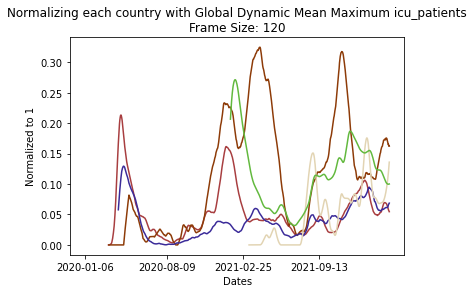

In [42]:
max_max_value_out_of_all_the_dates_for_each_country = diamond_df.max()[1:]
temp_df = diamond_df
#b = a.loc[a.iloc[:,1] > 0.1]
# for x in a:
#     print(x)
# filter2.loc[filter2['new_cases'] == global_new_case_maximum ]    
# a.loc[a['country'] == 0.004266455855784124 ]
# for x in Ldm.Dataframe_with_countries_as_column:
#     print(x)


counter = 1
small_data_country_index = []
medium_data_country_index = []
large_data_country_index = []
for x in max_max_value_out_of_all_the_dates_for_each_country:
    
    colname = temp_df.columns[counter]
    if x <= 0.33:
        small_data_country_index.append(colname)
        
    elif x > 0.33 and x <= 0.66:
        medium_data_country_index.append(colname)
    
    else:
        large_data_country_index.append(colname)
        
    counter += 1
        
print(small_data_country_index)
print(medium_data_country_index)
print(large_data_country_index)

plot_diamond_df(catagory = Catagory[i] , Name = "Global Dynamic Mean Max New Deaths S", countries= small_data_country_index, Type = 'Global Dynamic Mean', rolling_days = 14 )
# e.loc[850:,"France"]

In [64]:
old = Ldm.Dataframe_with_countries_as_column
old.loc[850:,"France"]

850    0.064938
851    0.061960
852    0.061960
853    0.059916
854    0.057288
855    0.054018
856    0.050923
857    0.050280
858    0.049930
859    0.045141
860    0.044324
861    0.043039
862    0.041521
863    0.039944
864    0.040002
865    0.040002
866    0.032294
867    0.034221
868    0.035739
869    0.036557
870    0.033929
871    0.036206
872    0.036148
873    0.029082
874    0.033345
875    0.032819
876    0.033287
877    0.033579
878    0.033403
879    0.033228
880    0.037141
881    0.033345
882    0.032703
883    0.032586
884    0.035447
885    0.033170
886    0.033170
887    0.038367
888    0.031827
889    0.031768
890    0.031359
891    0.031885
892    0.031885
893    0.031885
894    0.036206
895    0.037316
896    0.036557
897    0.039418
898    0.040878
899    0.040878
900    0.040878
901    0.045141
902    0.050339
903    0.053901
Name: France, dtype: float64

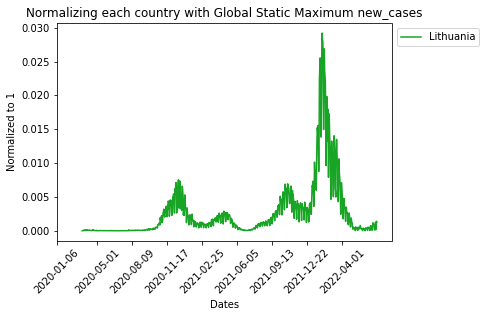

In [4]:
# Catagory = ["new_cases", "new_deaths", "hosp_patients", "icu_patients"]
# i = 3
# Ls = Local_Static(Catagory[i])
# Ls.Divide_by_local_max()
Ldm.plot_data_frame(["Lithuania"])

#plt.savefig('Max_Local_dynamic_maximum_' + Catagory[i] +'.png', dpi = 300)

In [25]:
Catagory[i]

'new_cases'

In [26]:
import numpy as np
new_df = Ldm.Dataframe_with_countries_as_column
# if not np.isnan(new_df.iloc[0,2]):
#     print("A")
temp_storage = new_df.copy()    
# else:
#     print("Bad")

#new_df.drop(new_df.index[0:4]).reset_index()
#new_df.reset_index()
temp_storage

country,date,Albania,Andorra,Austria,Belarus,Belgium,Bosnia and Herzegovina,Bulgaria,Croatia,Cyprus,...,San Marino,Serbia,Slovakia,Slovenia,Spain,Sweden,Switzerland,Ukraine,United Kingdom,Vatican
0,2020-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
897,2022-07-07,0.001655,NaN,0.021315,NaN,0.020782,0.000217,0.001430,0.001938,0.014137,...,0.000141,0.002720,0.001413,0.002051,0.079256,0.007972,NaN,0.0,0.001501,0.0
898,2022-07-08,0.001620,NaN,0.020512,NaN,0.011956,0.000194,0.001389,0.001734,0.028274,...,0.000177,0.002703,0.001308,0.001777,0.158512,NaN,NaN,0.0,0.003003,0.0
899,2022-07-09,0.001545,NaN,0.019710,NaN,0.015942,0.000161,0.001216,0.001459,NaN,...,0.000236,0.002594,0.001129,0.001523,NaN,NaN,NaN,0.0,NaN,0.0
900,2022-07-10,0.001369,NaN,0.029566,NaN,0.023912,0.000241,0.001483,0.000778,NaN,...,0.000023,0.002677,0.000604,0.000910,NaN,NaN,NaN,0.0,NaN,0.0


In [27]:
#b = Ldm.Dataframe_with_countries_as_column
b = temp_storage
c = b.iloc[:,0]
index = 1
for x in c:
    print (str(index) + "- " + str(x))
    index += 1


1- 2020-01-06 00:00:00
2- 2020-01-18 00:00:00
3- 2020-01-24 00:00:00
4- 2020-01-25 00:00:00
5- 2020-01-26 00:00:00
6- 2020-01-27 00:00:00
7- 2020-01-28 00:00:00
8- 2020-01-29 00:00:00
9- 2020-01-30 00:00:00
10- 2020-01-31 00:00:00
11- 2020-02-01 00:00:00
12- 2020-02-02 00:00:00
13- 2020-02-03 00:00:00
14- 2020-02-04 00:00:00
15- 2020-02-05 00:00:00
16- 2020-02-06 00:00:00
17- 2020-02-07 00:00:00
18- 2020-02-08 00:00:00
19- 2020-02-09 00:00:00
20- 2020-02-10 00:00:00
21- 2020-02-11 00:00:00
22- 2020-02-12 00:00:00
23- 2020-02-13 00:00:00
24- 2020-02-14 00:00:00
25- 2020-02-15 00:00:00
26- 2020-02-16 00:00:00
27- 2020-02-17 00:00:00
28- 2020-02-18 00:00:00
29- 2020-02-19 00:00:00
30- 2020-02-20 00:00:00
31- 2020-02-21 00:00:00
32- 2020-02-22 00:00:00
33- 2020-02-23 00:00:00
34- 2020-02-24 00:00:00
35- 2020-02-25 00:00:00
36- 2020-02-26 00:00:00
37- 2020-02-27 00:00:00
38- 2020-02-28 00:00:00
39- 2020-02-29 00:00:00
40- 2020-03-01 00:00:00
41- 2020-03-02 00:00:00
42- 2020-03-03 00:00:00
4

In [28]:

rolling_days = 14
row_count = new_df.shape[0]
column_count = new_df.shape[1]


temp_data_frame = new_df.copy()

for country_index in range(column_count):
    
    index_counter = 0
    
    #for each date in each country
    for date_index in range(row_count):
        
        #surpass all the Nan values in the dataframe then only proceed
        if not (np.isnan(new_df.iloc[date_index, country_index])):
           
            #summing of the rolling days from the copied data frame
            #!!!assuming that the dataframe is larger than the rolling_days parameter
            rolling_counter_index = date_index
            sum_for_mean = 0
            for index in range(rolling_days):
                sum_for_mean += temp_data_frame.iloc[rolling_counter_index, country_index]
                rolling_counter_index += 1
            
            #divide the sum by rolling days
            rolling_days_mean = sum_for_mean / rolling_days
            
            #updating the new value in the original dataframe
            new_df.iloc[rolling_counter_index - 1, country_index] = rolling_days_mean
            
            #reached the end of the dataframe
            if(rolling_counter_index - 1 == row_count-1):
                break
            
            #this function will work for the first number of rolling days 
            if index_counter < rolling_days:
                #removing (here filling with Nan value) the first rolling days values from the dataframe
                new_df.iloc[date_index, country_index] = np.nan
                index_counter += 1
            
            

    
new_df.reset_index(inplace = True)
   
        
        

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [47]:
temp = new_df.iloc[100:150,0:2]

# index = 1

# for x in temp:
#     print(str(index) + ". " + str(x))
#     index += 1
temp


country,date,Albania
100,2020-05-01,0.003624
101,2020-05-02,0.003595
102,2020-05-03,0.003475
103,2020-05-04,0.003266
104,2020-05-05,0.003147
105,2020-05-06,0.002953
106,2020-05-07,0.002670
107,2020-05-08,0.002565
108,2020-05-09,0.002148
109,2020-05-10,0.002118


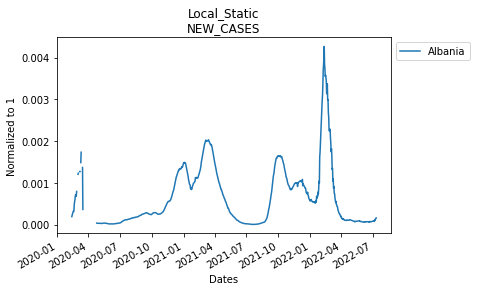

In [29]:
#dframe = Ldm.Dataframe_with_countries_as_column.reset_index()
dframe = new_df.iloc[:,0:2]
dframe['date'] = pd.to_datetime(df['date'])

# dframe['date']=dframe['date'].astype(str)
dframe.plot('date')
plt.title("Local_Static" + "\n"+ Catagory[i].upper())
plt.xlabel("Dates")
#plt.figure(figsize = (10,5), dpi = 400)
plt.ylabel("Normalized to 1")


plt.legend(bbox_to_anchor = (1.0,1.0))
#plt.savefig('AmolHarsh new Technique2' +'.png', dpi = 300)
#plt.figure(dpi = 400)



{'hello3': 42}